Rome Zeejah


We first need to import all of the necessary libraries in order to be able to perform our work and do our ERDs.


In [1]:
import sqlite3 #importing SQL
import pandas as pd #importing Pandas
import numpy as np #importing numpy
from scipy import stats #importing Scipy
import seaborn as sns #importing seaborn
import matplotlib.pyplot as plt #importing matplotlib
from pandasql import sqldf #to querry databases directly with SQL syntax
%matplotlib inline

In [2]:
gross_df= pd.read_csv("../../data/bom.movie_gross.csv.gz")

In [3]:
gross_df


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [4]:
budgets_df= pd.read_csv("../../data/tn.movie_budgets.csv.gz")

In [5]:
budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [6]:
movies_df= pd.read_csv("../../data/tmdb.movies.csv.gz")

In [7]:
movies_df



,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [8]:
df_info = pd.read_csv("../../data/rt.movie_info.tsv.gz", sep='\t')

In [9]:
df_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [10]:
df_reviews = pd.read_csv("../../data/rt.reviews.tsv.gz", sep='\t', engine = 'python')

In [11]:
df_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [12]:
conn = sqlite3.connect('../../data/im.db')

In [13]:
df = pd.read_sql("""SELECT * FROM sqlite_master;""", conn)
df.head()

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."


In [14]:
basics_df = pd.read_sql("""SELECT DISTINCT * FROM movie_basics;""", conn)
basics_df.info() #loads basics table into dataframe and displays info
basics_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [15]:
ratings_df = pd.read_sql("""SELECT * FROM movie_ratings;""", conn)
ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [16]:
joined_tables_df = pd.read_sql("""SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
WHERE averagerating >= 8
GROUP BY genres
ORDER BY averagerating DESC
;
""", conn)

In [17]:
joined_tables_df.head(25)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt7541970,From Shock to Awe,From Shock to Awe,2017,87.0,"Documentary,War",9.7,6
1,tt1740810,Love on a Leash,Love on a Leash,2010,10.0,"Documentary,Family,Romance",9.7,25
2,tt10146728,Foosballers,Foosballers,2019,NaN,"Comedy,Documentary,Sport",9.7,22
3,tt5963218,Aloko Udapadi,Aloko Udapadi,2017,113.0,"Drama,History",9.5,6509
4,tt1791606,Some Called Them Baby Killers... We Call Them ...,Some Called Them Baby Killers... We Call Them ...,2010,93.0,"Documentary,Drama,War",9.4,5
5,tt4460258,Of Dogs and Men,Of Dogs and Men,2016,89.0,"Crime,Documentary,News",9.4,12
6,tt4135932,Lost Conquest,Lost Conquest,2015,70.0,"Comedy,Documentary,Fantasy",9.4,5
7,tt5858514,The Children of Genghis,Chingisiin huuhduud,2017,101.0,"Adventure,Family",9.4,797
8,tt8593814,The Boys Are Back - Bandstand: The Broadway Mu...,The Boys Are Back - Bandstand: The Broadway Mu...,2018,130.0,Musical,9.3,50
9,tt3856476,Sunakali,Sunakali,2017,59.0,"Documentary,Family,Musical",9.3,19


In [18]:
joined_tables_df['genres'] = joined_tables_df['genres'].str.split(",") # split the genres and added a space in order to use the explode function 

In [19]:

# used explode fucntion to seperate movies based on genres

In [20]:
genres_split_df # the seperation was loaded into this dataframe

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt7541970,From Shock to Awe,From Shock to Awe,2017,87.0,Documentary,9.7,6
0,tt7541970,From Shock to Awe,From Shock to Awe,2017,87.0,War,9.7,6
1,tt1740810,Love on a Leash,Love on a Leash,2010,10.0,Documentary,9.7,25
1,tt1740810,Love on a Leash,Love on a Leash,2010,10.0,Family,9.7,25
1,tt1740810,Love on a Leash,Love on a Leash,2010,10.0,Romance,9.7,25
...,...,...,...,...,...,...,...,...
458,tt3796898,Mousetrap 2,Mousetrap 2,2014,80.0,Adventure,8.0,12
458,tt3796898,Mousetrap 2,Mousetrap 2,2014,80.0,Crime,8.0,12
459,tt1663202,The Revenant,The Revenant,2015,156.0,Action,8.0,621193
459,tt1663202,The Revenant,The Revenant,2015,156.0,Adventure,8.0,621193


In [38]:
genres_split_df['genres'].value_counts() # the value counts shows us the genre categories and the the counts

Drama          147
Documentary    123
Comedy         116
Adventure       72
Action          71
Mystery         59
Thriller        58
Romance         54
Fantasy         53
Family          52
Crime           50
History         50
Biography       49
Animation       39
Sci-Fi          38
Music           36
Musical         34
Sport           30
Horror          28
War             27
News            17
Western         15
Reality-TV       3
Game-Show        1
Short            1
Name: genres, dtype: int64

In [39]:
genre_keys=genres_split_df['genres'].value_counts().keys()

In [40]:
genre_values=genres_split_df['genres'].value_counts().values

In [53]:
genre_values

array([147, 123, 116,  72,  71,  59,  58,  54,  53,  52,  50,  50,  49,
        39,  38,  36,  34,  30,  28,  27,  17,  15,   3,   1,   1],
      dtype=int64)

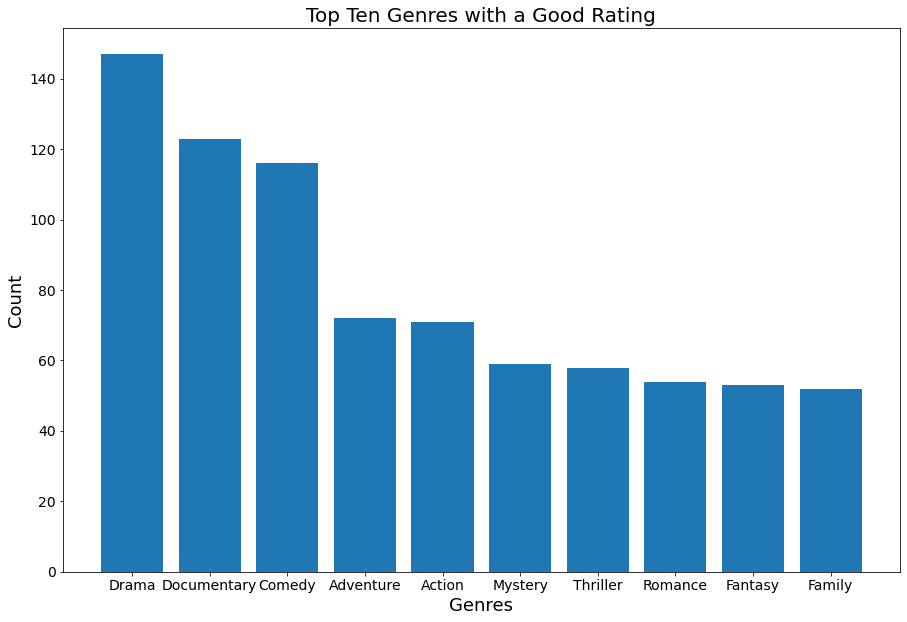

In [88]:

fig, ax = plt.subplots(figsize= (15,10) )
ax.bar(genre_keys[:10],genre_values[:10]) #the [:10] is to see the top ten genres in the dataset 
ax.set_title('Top Ten Genres with a Good Rating', fontsize= 20)
ax.set_xlabel('Genres',fontsize= 18)
ax.set_ylabel('Count',fontsize= 18)
ax.tick_params(axis='x', which='both', labelsize=14)
ax.tick_params(axis='y', which='both', labelsize=14)


Text(0.5, 1.0, 'Percentages by Genre')

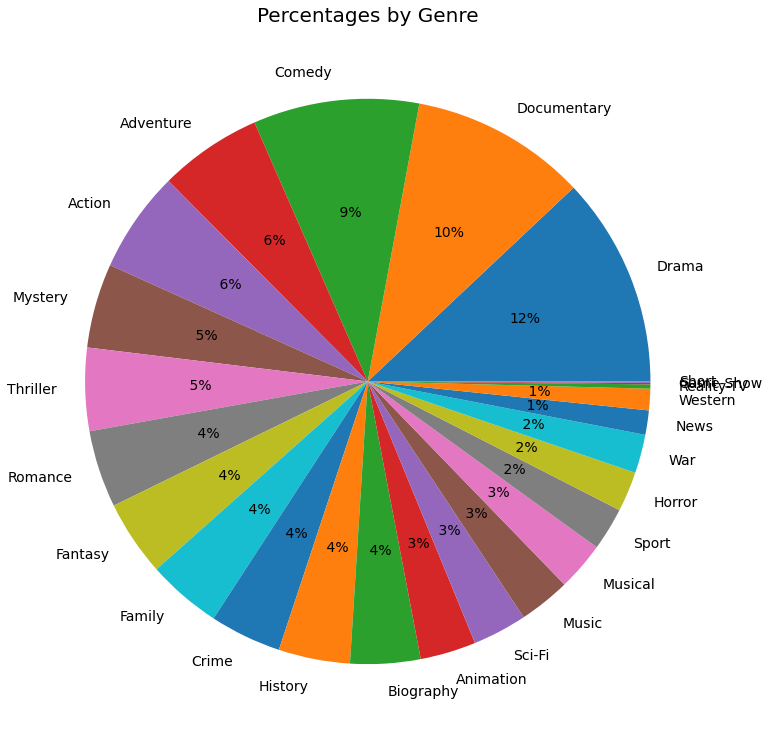

In [103]:
fig, ax = plt.subplots(figsize= (13,13) )
ax.pie(genre_values, labels=genre_keys,autopct = lambda x:'{:2.0f}%'.format(x) if x>1 else '',textprops={'fontsize': 14}) #creates pie chart with the different genres
ax.tick_params(axis='x', which='both', labelsize=25)
ax.set_title('Percentages by Genre', fontsize= 20)


In [104]:
genres_split_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt7541970,From Shock to Awe,From Shock to Awe,2017,87.0,Documentary,9.7,6
0,tt7541970,From Shock to Awe,From Shock to Awe,2017,87.0,War,9.7,6
1,tt1740810,Love on a Leash,Love on a Leash,2010,10.0,Documentary,9.7,25
1,tt1740810,Love on a Leash,Love on a Leash,2010,10.0,Family,9.7,25
1,tt1740810,Love on a Leash,Love on a Leash,2010,10.0,Romance,9.7,25
...,...,...,...,...,...,...,...,...
458,tt3796898,Mousetrap 2,Mousetrap 2,2014,80.0,Adventure,8.0,12
458,tt3796898,Mousetrap 2,Mousetrap 2,2014,80.0,Crime,8.0,12
459,tt1663202,The Revenant,The Revenant,2015,156.0,Action,8.0,621193
459,tt1663202,The Revenant,The Revenant,2015,156.0,Adventure,8.0,621193


In [117]:
genres_split_df.groupby('genres')['averagerating'].mean()

genres
Action         8.314085
Adventure      8.427778
Animation      8.207692
Biography      8.359184
Comedy         8.404310
Crime          8.374000
Documentary    8.530894
Drama          8.425170
Family         8.507692
Fantasy        8.373585
Game-Show      9.000000
History        8.422000
Horror         8.332143
Music          8.402778
Musical        8.450000
Mystery        8.354237
News           8.500000
Reality-TV     8.766667
Romance        8.490741
Sci-Fi         8.310526
Short          8.800000
Sport          8.483333
Thriller       8.277586
War            8.592593
Western        8.386667
Name: averagerating, dtype: float64

In [120]:
jt_df = pd.read_sql("""SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
GROUP BY genres
ORDER BY averagerating DESC
;
""", conn)

In [121]:
jt_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt1740810,Love on a Leash,Love on a Leash,2010,10.0,"Documentary,Family,Romance",9.7,25
1,tt10146728,Foosballers,Foosballers,2019,NaN,"Comedy,Documentary,Sport",9.7,22
2,tt4135932,Lost Conquest,Lost Conquest,2015,70.0,"Comedy,Documentary,Fantasy",9.4,5
3,tt3856476,Sunakali,Sunakali,2017,59.0,"Documentary,Family,Musical",9.3,19
4,tt5903964,The Long Count Teaser,The Long Count Teaser,2016,NaN,"History,Sport",9.2,5
...,...,...,...,...,...,...,...,...
919,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248
920,tt0937353,The Devil's Flower,Tsvetok dyavola,2010,90.0,"Mystery,Romance",1.7,201
921,tt5161302,Eyal Hirrifah,Eyal Hirrifah,2015,101.0,"Comedy,Musical,Sport",1.4,28
922,tt1865374,Futures Past,Futures Past,2012,120.0,"Action,Biography,History",1.3,33


In [122]:
jt_df['genres'] = jt_df['genres'].str.split(",") 

In [124]:
jt_df=jt_df.explode('genres')

In [125]:
jt_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt1740810,Love on a Leash,Love on a Leash,2010,10.0,Documentary,9.7,25
0,tt1740810,Love on a Leash,Love on a Leash,2010,10.0,Family,9.7,25
0,tt1740810,Love on a Leash,Love on a Leash,2010,10.0,Romance,9.7,25
1,tt10146728,Foosballers,Foosballers,2019,NaN,Comedy,9.7,22
1,tt10146728,Foosballers,Foosballers,2019,NaN,Documentary,9.7,22
...,...,...,...,...,...,...,...,...
922,tt1865374,Futures Past,Futures Past,2012,120.0,Biography,1.3,33
922,tt1865374,Futures Past,Futures Past,2012,120.0,History,1.3,33
923,tt3437164,Maldito Amor,Maldito Amor,2014,100.0,Comedy,1.1,168
923,tt3437164,Maldito Amor,Maldito Amor,2014,100.0,History,1.1,168


In [128]:
avg_rating_genres=jt_df.groupby('genres')['averagerating'].mean()

In [155]:
sorted_avg_genres=avg_rating_genres.sort_values(ascending=False)

In [156]:
avg_keys=sorted_avg_genres.keys()
avg_keys
avg_values=sorted_avg_genres.values
avg_values

array([8.8       , 7.37861272, 7.3       , 6.86176471, 6.66842105,
       6.6375    , 6.5546875 , 6.46      , 6.45575221, 6.36229508,
       6.36017699, 6.3255814 , 6.32278481, 6.29214286, 6.21025641,
       6.20702703, 6.18073394, 6.12362205, 6.12066116, 6.08461538,
       6.08360656, 6.06724138, 5.88773585, 5.88235294, 5.3616    ,
       2.7       ])

In [175]:
def addlabels(x,y):

    for i in range(len(x)):

        plt.text(i, y[i], y[i], ha = 'center',

                 Bbox = dict(facecolor = 'red', alpha =.8))

 

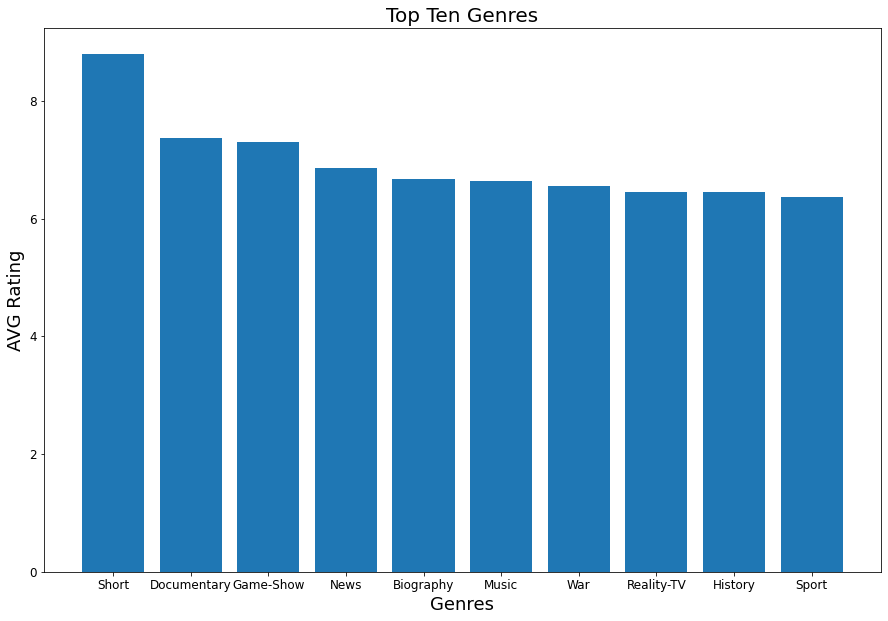

In [176]:

fig, ax = plt.subplots(figsize= (15,10) )
ax.bar(avg_keys[:10],avg_values[:10]) #the [:10] is to see the top ten genres in the dataset 
ax.set_title('Top Ten Genres', fontsize= 20)
ax.set_xlabel('Genres',fontsize= 18)
ax.set_ylabel('AVG Rating',fontsize= 18)
ax.tick_params(axis='x', which='both', labelsize=12)
ax.tick_params(axis='y', which='both', labelsize=12)


Text(0.5, 1.0, 'Percentages by Genre')

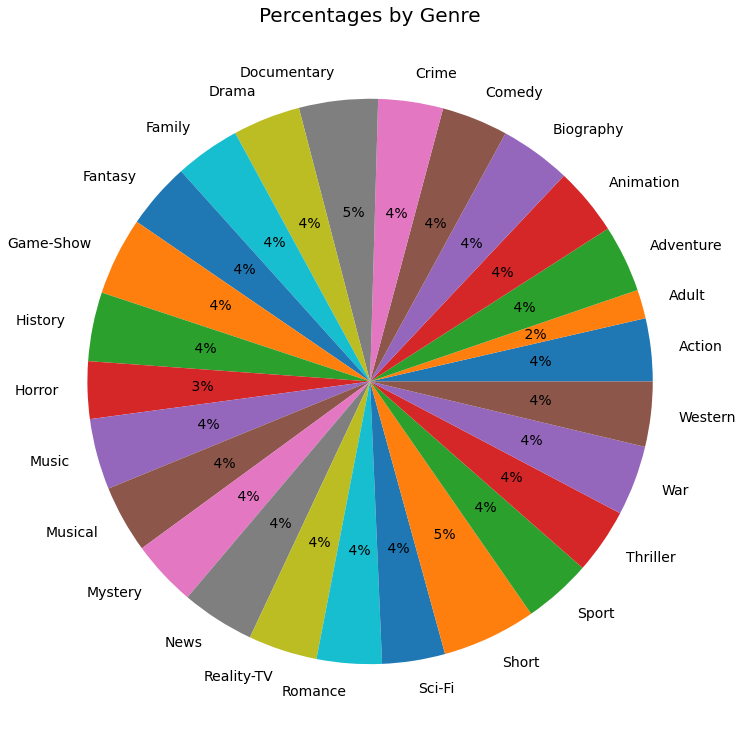

In [160]:
plt.text(x, y, s, ha, Bbox)

NameError: name 'y' is not defined